In [7]:
import os
import random
from glob import glob
import torch

import torch.utils.data as data
import torchvision.transforms.functional as F
from torchvision import transforms
import numpy as np
from PIL import Image
import json
import cv2

from datasets.fsc_data import FSCData
from matplotlib import pyplot as plt
%matplotlib inline

data_dir = "./datasets/FSC"

In [8]:
train_dataset = FSCData(data_dir,
                            384,
                            16,
                            method='val')

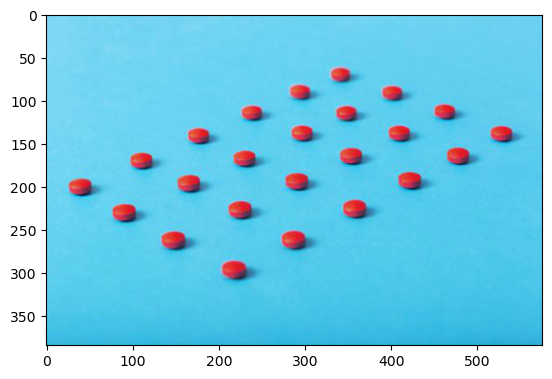

In [9]:
# Visualize the image
img = train_dataset[1230][0].permute(1, 2, 0)
img -= torch.min(img)
img /= torch.max(img)
plt.imshow(img)

In [10]:
from models.convtrans import VGG16Trans

model = VGG16Trans(8)
model.load_state_dict(torch.load('./checkpoint/0524_fsc-baseline/best_model.pth'))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)
model.eval()

VGG16Trans(
  (encoder): Sequential(
    (0): ConvBlock(
      (body): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (1): ConvBlock(
      (body): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): ConvBlock(
      (body): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (4): ConvBlock(
      (body): Sequential(
        (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padd

46.000004 11.724366455078124 18.29


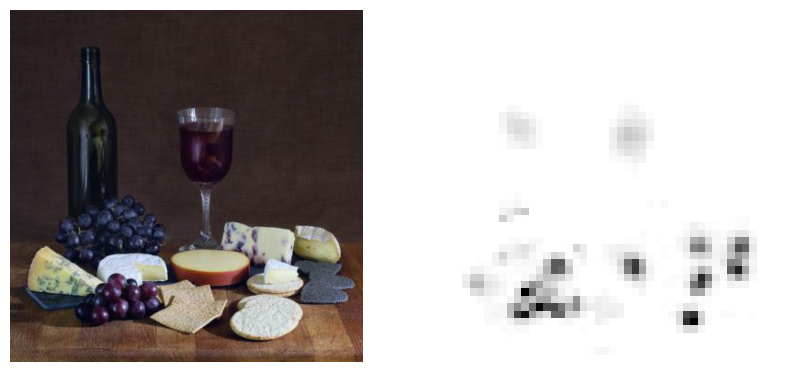

In [22]:
i = i+1
img, count, _, __ = train_dataset[i]

# make img grayscale
# img = torch.mean(img, dim=0, keepdim=True)
# img = img.repeat(3, 1, 1)

img -= torch.min(img)
img /= torch.max(img)
img = img.unsqueeze(0).to(device)
output = model(img)

output = output.squeeze(0).squeeze(0).cpu().detach().numpy()

output_count = np.sum(output)
binary_output = np.where(output > 1e-8, 0, 1)
print(count, output_count/100, np.sum(binary_output)/100)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the image
axes[0].imshow(img.squeeze(0).permute(1,2,0).cpu().detach().numpy())
axes[0].axis('off')
# axes[1].imshow(dmap.squeeze(0), cmap='binary')
# axes[1].axis('off')
axes[1].imshow(output, cmap='binary')
axes[1].axis('off')

# Show the plot
plt.show()